.. _VisualisingGraphs:

# Visualising Provenance Graphs

In [5]:
from aiida import load_profile
profile = load_profile()

In [6]:
from aiida.backends.tests.utils.archives import get_archive_file
from aiida.tools.visualization import Graph
from aiida.common.links import LinkType

In [ ]:
archive_path = get_archive_file('graph1.aiida', 'graphs')
!verdi import -n {archive_path}

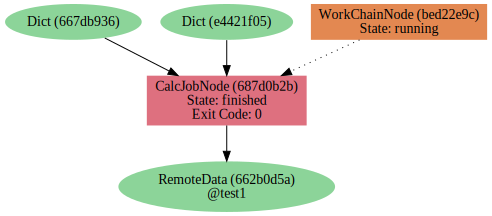

In [7]:
graph = Graph(node_id_type="uuid")
graph.add_incoming("687d0b2b-c66b-415e-9a52-4ad56a237b81")
graph.add_outgoing("687d0b2b-c66b-415e-9a52-4ad56a237b81")
graph.graphviz

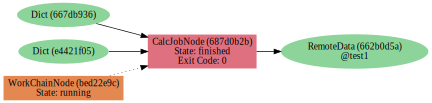

In [10]:
graph = Graph(node_id_type="uuid", graph_attr={"size": "6,6!", "rankdir": "LR"})
graph.add_incoming("687d0b2b-c66b-415e-9a52-4ad56a237b81")
graph.add_outgoing("687d0b2b-c66b-415e-9a52-4ad56a237b81")
graph.graphviz

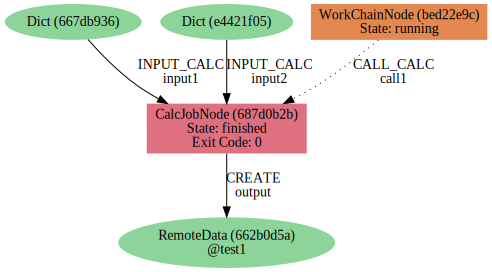

In [8]:
graph = Graph(node_id_type="uuid")
graph.add_incoming("687d0b2b-c66b-415e-9a52-4ad56a237b81",
                   annotate_links="both")
graph.add_outgoing("687d0b2b-c66b-415e-9a52-4ad56a237b81",
                   annotate_links="both")
graph.graphviz

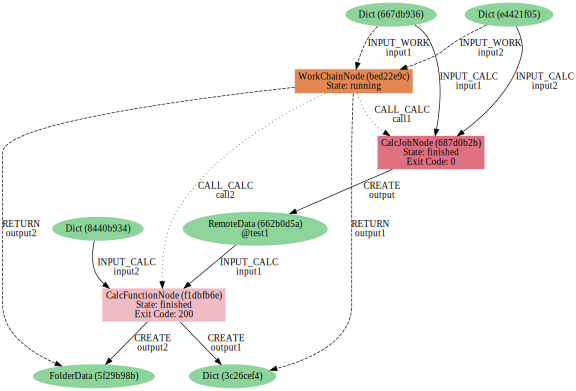

In [11]:
graph = Graph(node_id_type="uuid", graph_attr={"size": "8,8!"})
graph.recurse_descendants(
    "667db936-8411-4868-84d1-67688c2aaec6", 
    include_process_inputs=True,
    annotate_links="both"
)
graph.graphviz

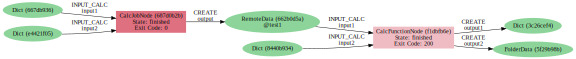

In [13]:
graph = Graph(node_id_type="uuid", graph_attr={"size": "8,8!", "rankdir": "LR"})
graph.recurse_descendants(
    "667db936-8411-4868-84d1-67688c2aaec6", 
    include_process_inputs=True,
    annotate_links="both",
    link_types=("input_calc", "create")
)
graph.graphviz

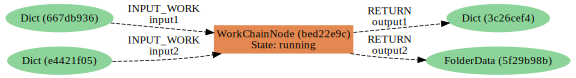

In [14]:
graph = Graph(node_id_type="uuid", graph_attr={"size": "8,8!", "rankdir": "LR"})
graph.recurse_descendants(
    "667db936-8411-4868-84d1-67688c2aaec6", 
    include_process_inputs=True,
    annotate_links="both",
    link_types=("input_work", "return")
)
graph.graphviz

In [15]:
from aiida import orm
qb = orm.QueryBuilder()
qb.append(orm.Node, project=["id"])
" ".join([str(a[0]) for a in qb.all()])

'8534 8535 8536 8537 8538 8539 8540 8541 8542'

In [16]:
from aiida import orm
qb = orm.QueryBuilder()
qb.append(orm.Computer, project=["id"])
" ".join([str(a[0]) for a in qb.all()])

'1468 1469 1470 1471'